# **Northwind Suppliers Analysis**

## **Data Collection**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm
plt.style.use('ggplot')

In [17]:
products_cols = ["ProductID","ProductName","SupplierID","CategoryID","UndiscountedUnitPrice","UnitsInStock","UnitsOnOrder","ReorderLevel","Discontinued"]
suppliers_cols = ["SupplierID","SupplierName","ContactName","ContactTitle","City","Region","Country"]
orders_cols = ["OrderID","OrderDate","RequiredDate","ShippedDate","ShipVia","Freight","ShipName","ShipCity","ShipRegion","ShipPostalCode","ShipCountry"]
categories_cols = ["CategoryID","CategoryName"]

products = pd.read_csv("../data/products.csv", usecols=products_cols, encoding='latin1')
categories = pd.read_csv("../data/categories.csv", usecols=categories_cols, encoding='latin1')
suppliers = pd.read_csv("../data/suppliers.csv", usecols=suppliers_cols, encoding='latin1')
orders = pd.read_csv("../data/orders.csv", usecols= orders_cols, encoding='latin1')
order_details = pd.read_csv("../data/order_details.csv",encoding='latin1')
shippers = pd.read_csv("../data/shippers.csv",encoding='latin1')


In [18]:
table_dict = {"products": products, "categories":categories,"suppliers": suppliers, "orders": orders, "order_details": order_details, "shippers": shippers}


for table_name, table in table_dict.items():
    print(f"{table_name} table has {table.shape[0]} rows and {table.shape[1]} columns")
    print(table.info())
    print("\n")

products table has 77 rows and 9 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ProductID              77 non-null     int64 
 1   ProductName            77 non-null     object
 2   SupplierID             77 non-null     int64 
 3   CategoryID             77 non-null     int64 
 4   UndiscountedUnitPrice  77 non-null     object
 5   UnitsInStock           77 non-null     int64 
 6   UnitsOnOrder           77 non-null     int64 
 7   ReorderLevel           77 non-null     int64 
 8   Discontinued           77 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 5.5+ KB
None


categories table has 8 rows and 2 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Category

In [19]:
display(products.head(3), categories.head(3),suppliers.head(3), orders.head(3), order_details.head(3), shippers.head(3))

,ProductID,ProductName,SupplierID,CategoryID,UndiscountedUnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,$18.00,39,0,10,0
1,2,Chang,1,1,$19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,$10.00,13,70,25,0


,CategoryID,CategoryName
0,1,Beverages
1,2,Condiments
2,3,Confections


,SupplierID,SupplierName,ContactName,ContactTitle,City,Region,Country
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,NaN,UK
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,New Orleans,LA,USA
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,Ann Arbor,MI,USA


,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10389,1995-01-20,1995-02-17,1995-01-24,2,47.42,Bottom-Dollar Markets,Tsawassen,BC,T2F 8M4,Canada
1,10390,1995-01-23,1995-02-20,1995-01-26,1,126.38,Ernst Handel,Graz,NaN,8010,Austria
2,10391,1995-01-23,1995-02-20,1995-01-31,3,5.45,Drachenblut Delikatessen,Aachen,NaN,52066,Germany


,OrderID,ProductID,DiscountedUnitPrice,Quantity
0,10248,11,14.0,12
1,10248,42,9.8,10
2,10248,72,34.8,5


,ShipperID,ShipperName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


## **Data Preparation**

In [20]:
products["UndiscountedUnitPrice"] = products["UndiscountedUnitPrice"].str.replace("$","").astype("float64")

orders["OrderDate"] = pd.to_datetime(orders["OrderDate"])
orders["ShippedDate"] = pd.to_datetime(orders["ShippedDate"])
orders["RequiredDate"] = pd.to_datetime(orders["RequiredDate"])
orders['ShippingTime'] = (orders['ShippedDate'] - orders['OrderDate']).dt.days

orders.rename(columns={"ShipVia":"ShipperID"}, inplace=True)

In [21]:
products_required_cols = [col for col in products.columns if col not in ["UnitsInStock","UnitsOnOrder"]]

suppliers_analysis = (
    products[products_required_cols].merge(categories, on="CategoryID")
    .merge(suppliers, on="SupplierID")
    .merge(order_details, on="ProductID")
    .merge(orders, on="OrderID")
    .merge(shippers, on="ShipperID")
)

suppliers_analysis.head()

,ProductID,ProductName,SupplierID,CategoryID,UndiscountedUnitPrice,ReorderLevel,Discontinued,CategoryName,SupplierName,ContactName,...,ShipperID,Freight,ShipName,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ShippingTime,ShipperName,Phone
0,1,Chai,1,1,18.0,10,0,Beverages,Exotic Liquids,Charlotte Cooper,...,2,76.83,QUICK-Stop,Cunewalde,NaN,01307,Germany,6.0,United Package,(503) 555-3199
1,1,Chai,1,1,18.0,10,0,Beverages,Exotic Liquids,Charlotte Cooper,...,2,147.26,Rattlesnake Canyon Grocery,Albuquerque,NM,87110,USA,6.0,United Package,(503) 555-3199
2,1,Chai,1,1,18.0,10,0,Beverages,Exotic Liquids,Charlotte Cooper,...,1,12.69,Lonesome Pine Restaurant,Portland,OR,97219,USA,10.0,Speedy Express,(503) 555-9831
3,1,Chai,1,1,18.0,10,0,Beverages,Exotic Liquids,Charlotte Cooper,...,2,0.78,Die Wandernde Kuh,Stuttgart,NaN,70563,Germany,8.0,United Package,(503) 555-3199
4,1,Chai,1,1,18.0,10,0,Beverages,Exotic Liquids,Charlotte Cooper,...,3,53.80,Pericles Comidas clÃ¡sicas,MÃ©xico D.F.,NaN,05033,Mexico,6.0,Federal Shipping,(503) 555-9931


In [22]:
suppliers_analysis["Revenue"] = suppliers_analysis["DiscountedUnitPrice"]*suppliers_analysis["Quantity"]

suppliers_analysis = suppliers_analysis.loc[suppliers_analysis["Discontinued"]==0]

suppliers_analysis.head(3)

,ProductID,ProductName,SupplierID,CategoryID,UndiscountedUnitPrice,ReorderLevel,Discontinued,CategoryName,SupplierName,ContactName,...,Freight,ShipName,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ShippingTime,ShipperName,Phone,Revenue
0,1,Chai,1,1,18.0,10,0,Beverages,Exotic Liquids,Charlotte Cooper,...,76.83,QUICK-Stop,Cunewalde,NaN,01307,Germany,6.0,United Package,(503) 555-3199,648.0
1,1,Chai,1,1,18.0,10,0,Beverages,Exotic Liquids,Charlotte Cooper,...,147.26,Rattlesnake Canyon Grocery,Albuquerque,NM,87110,USA,6.0,United Package,(503) 555-3199,259.2
2,1,Chai,1,1,18.0,10,0,Beverages,Exotic Liquids,Charlotte Cooper,...,12.69,Lonesome Pine Restaurant,Portland,OR,97219,USA,10.0,Speedy Express,(503) 555-9831,288.0


In [23]:
suppliers_analysis.to_csv("suppliers_analysis.csv", index=False)

## **Analysis**

### **Supplier Order Volume Analysis**

**Objectives**
- Identify suppliers with the highest number of orders.
- Analyze order distribution among suppliers.

**Business Use-case**
- Helps in understanding supplier demand trends.
- Supports procurement planning and supplier diversification.


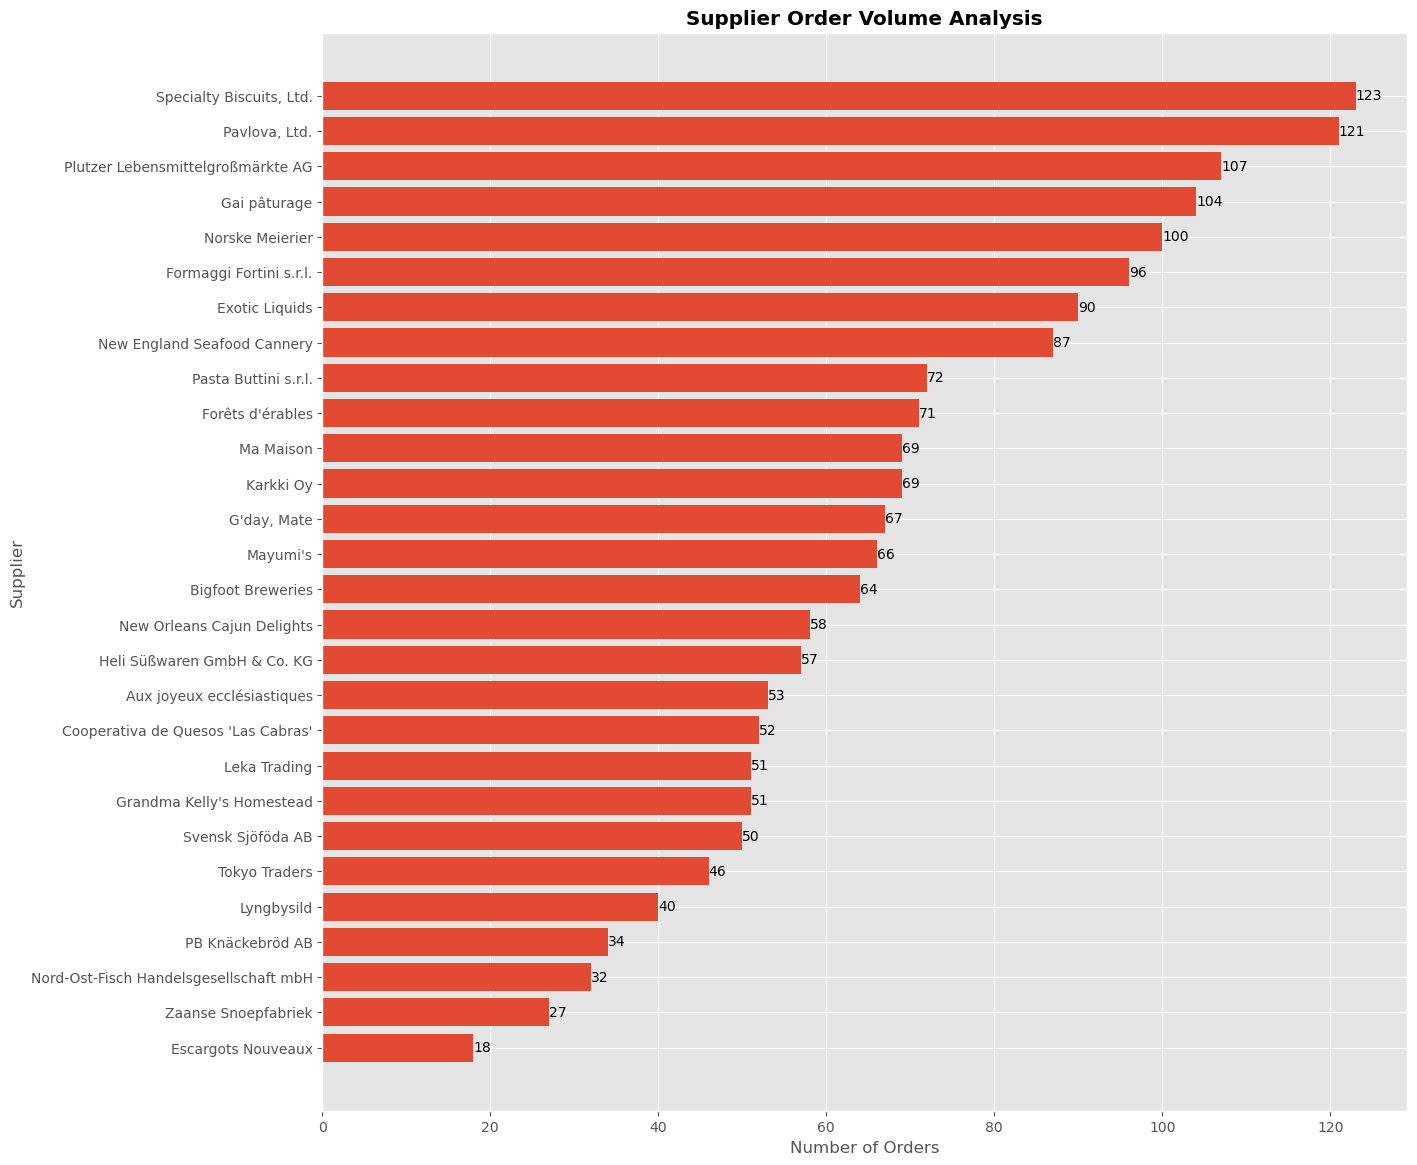

In [24]:
# Calculate unique order counts per supplier
supplier_orders = suppliers_analysis.groupby("SupplierName")["OrderID"].nunique().reset_index()
                   

supplier_orders.sort_values("OrderID", inplace=True)

# Plot using object-oriented approach
fig, ax = plt.subplots(figsize=(14, 14))
bars = ax.barh(supplier_orders["SupplierName"], supplier_orders["OrderID"])

# Show values at the end of the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', 
            va='center', ha='left', color='black')

# Make title bold
ax.set_title("Supplier Order Volume Analysis", fontweight='bold')
ax.set_xlabel("Number of Orders")
ax.set_ylabel("Supplier")
plt.show()

### **Insights & Business Recommendations**

| Supplier Name                          | Insights                                                                 | Business Recommendations                                                                 |
|----------------------------------------|--------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| Specialty Biscuits, Ltd.               | Highest number of orders among all suppliers.                            | Consider strengthening the relationship and exploring bulk discounts or exclusive deals.  |
| Pavlova, Ltd.                         | Second highest number of orders, close to the top supplier.              | Monitor performance and consider incentives to maintain or increase order volume.         |
| Plutzer Lebensmittelgnölmärkte AG      | Third in order volume, significant but not leading.                      | Evaluate product performance and consider marketing strategies to boost sales.            |
| Gai pätiarage                          | High order volume, consistent with top performers.                       | Assess customer satisfaction and explore opportunities for product diversification.       |
| Norske Meierler                        | Moderate order volume, within the top five.                              | Review supply chain efficiency and consider regional expansion strategies.                |
| Formaggi Fortini s.r.l.                | Moderate order volume, slightly below top performers.                    | Investigate potential for increasing market share through promotions or partnerships.     |
| Exotic Liquids                         | Moderate order volume, but not in the top tier.                          | Explore new markets or product lines to increase order volume.                            |
| New England Seafood Cannery            | Lower moderate order volume, potential for growth.                       | Consider targeted marketing campaigns and customer feedback for improvement.              |
| Pasta Buttini s.r.l.                   | Lower order volume compared to top suppliers.                            | Assess product appeal and consider rebranding or product enhancements.                   |
| Forêts d’érables                       | Low order volume, similar to other lower-tier suppliers.                 | Evaluate market positioning and consider niche marketing strategies.                      |
| Ma Maison                              | Low order volume, potential for improvement.                             | Investigate customer preferences and consider product line adjustments.                   |
| Karkki Oy                              | Low order volume, similar to Ma Maison.                                  | Explore partnerships or collaborations to increase visibility and sales.                  |
| G’day, Mate                           | Low order volume, needs strategic focus.                                 | Consider regional marketing efforts and customer engagement initiatives.                  |
| Mayumi’s                               | Low order volume, potential for targeted growth.                         | Assess brand perception and consider loyalty programs or customer incentives.             |
| Bigfoot Breweries                      | Low order volume, similar to other lower-tier suppliers.                 | Evaluate distribution channels and consider expanding to new regions or markets.          |
| New Orleans Cajun Delights             | Low order volume, needs strategic interventions.                         | Consider product innovation and customer feedback for improvement.                        |
| Hell Süßwaren GmbH & Co. KG            | Low order volume, potential for niche marketing.                         | Explore niche markets and consider product customization options.                         |
| Aux joyeux ecclésiastiques             | Low order volume, similar to other lower-tier suppliers.                 | Assess market trends and consider aligning products with current consumer preferences.     |
| Cooperativa de Quesos ‘Las Cabras’     | Low order volume, potential for targeted marketing.                      | Consider regional promotions and partnerships to increase order volume.                   |
| Leka Trading                           | Low order volume, needs strategic focus.                                 | Evaluate product offerings and consider customer engagement strategies.                   |
| Grandma Kelly’s Homestead              | Low order volume, similar to Leka Trading.                               | Assess brand positioning and consider marketing campaigns to increase visibility.          |
| Svensk Sjöföda AB                      | Low order volume, potential for growth.                                  | Explore export opportunities and consider product diversification.                        |
| Tokyo Traders                          | Low order volume, needs strategic interventions.                          | Consider market research and customer feedback for product improvement.                   |
| Uynphysild                             | Low order volume, potential for targeted growth.                         | Assess market demand and consider aligning products with consumer needs.                   |
| PB Knäckebröd AB                       | Low order volume, similar to other lower-tier suppliers.                 | Evaluate distribution strategies and consider expanding to new markets.                   |
| Nord-Ost-Fisch Handelsgesellschaft mbH | Low order volume, needs strategic focus.                                 | Consider product innovation and customer engagement initiatives.                          |
| Zaanse Snoepfabriek                    | Low order volume, potential for niche marketing.                         | Explore niche markets and consider product customization options.                         |
| Escargots Nouveaux                     | Lowest order volume among all suppliers.                                 | Assess market viability and consider strategic partnerships or product rebranding.        |

---

### **Supplier Dependency Analysis**

**Objectives**
- Assess the number of products provided by each supplier.
- Determine the level of dependency on individual suppliers for the product portfolio.

**Business Use-case**

Understanding supplier dependency is critical for risk management. A high concentration of products from a few suppliers may expose the business to supply disruptions, prompting a need to diversify supplier relationships.


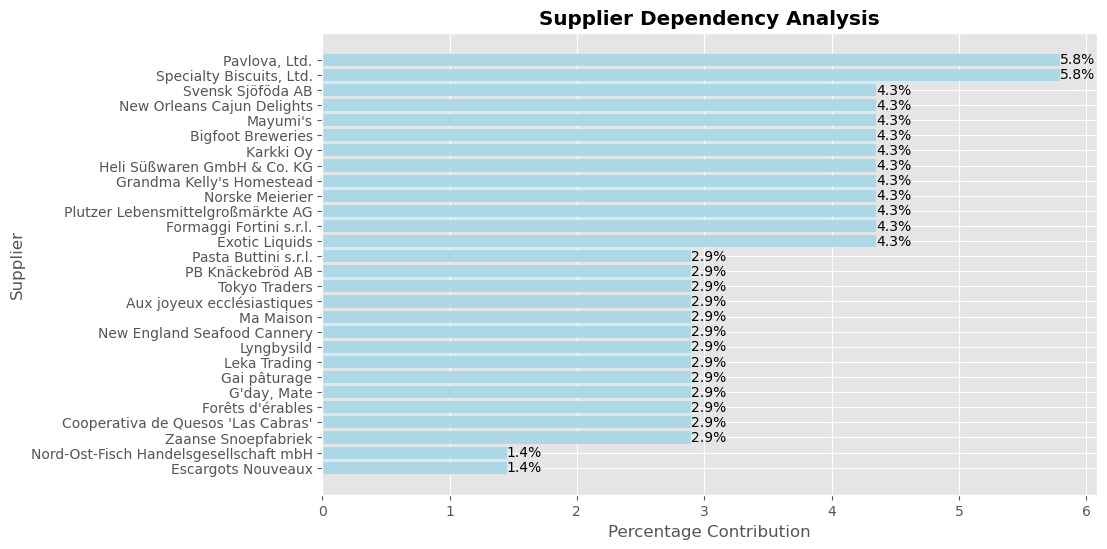

In [25]:
supplier_products = (
    suppliers_analysis.groupby("SupplierName")["ProductID"].nunique().reset_index()
    .rename(columns={"ProductID":"UniqueProducts"})
    .sort_values("UniqueProducts", ascending=False)
)
supplier_products['ProductPercentage'] = supplier_products['UniqueProducts'] / supplier_products['UniqueProducts'].sum() * 100


supplier_products.sort_values("ProductPercentage", inplace=True)   

# Plot using object-oriented approach (Horizontal bar chart)
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(supplier_products["SupplierName"], supplier_products["ProductPercentage"], color="lightblue") #color=plt.cm.Paired.colors

# Show values at the end of the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.1f}%', 
            va='center', ha='left', color='black')

# Make title bold
ax.set_title("Supplier Dependency Analysis", fontweight='bold')
ax.set_xlabel("Percentage Contribution")
ax.set_ylabel("Supplier")
plt.show()

### **Insights & Business Recommendations**

| Supplier's Name                  | Insights                                                                 | Business Recommendations                                                                 |
|----------------------------------|--------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| Pavlova, Ltd.                    | Highest percentage contribution among suppliers.                        | Consider strengthening the relationship and ensuring supply chain stability.             |
| Specialty Biscuits, Ltd.         | High percentage contribution, similar to Pavlova, Ltd.                   | Diversify suppliers to reduce dependency and mitigate risks.                             |
| Svensk Sjofoba AB                | Significant but lower contribution compared to top suppliers.            | Monitor performance and explore cost-effective alternatives if necessary.                |
| New Orleans Cajun Delights       | Moderate contribution level.                                             | Assess the quality and reliability of supply before increasing dependency.               |
| Mayumis                          | Moderate contribution level.                                             | Evaluate the potential for increasing orders if quality and reliability are confirmed.   |
| Bigfoot Breweries                | Moderate contribution level.                                             | Consider long-term contracts to secure supply at favorable terms.                        |
| Karkki Oy                        | Moderate contribution level.                                             | Explore opportunities for bulk purchasing to reduce costs.                               |
| Heil Süßwaren GmbH & Co.KG       | Moderate contribution level.                                             | Assess the supplier's capacity to handle potential increases in demand.                  |
| Grandma Kelly's Homestead        | Moderate contribution level.                                             | Ensure consistent quality and delivery performance before increasing dependency.          |
| Norske Meierler                  | Moderate contribution level.                                             | Monitor market trends and adjust orders based on demand forecasts.                       |
| Plutzer LebensmittelgroSmärkte AG| Moderate contribution level.                                             | Consider regional diversification to mitigate geopolitical risks.                        |
| Formaggi Fortini s.r.l.          | Moderate contribution level.                                             | Evaluate the supplier's innovation capabilities for potential product development.       |
| Exotic Liquids                   | Moderate contribution level.                                             | Assess the supplier's sustainability practices for long-term partnerships.               |
| Pasta Buttini s.r.l.             | Lower contribution level.                                                | Consider reducing dependency unless there are strategic reasons to maintain the supplier.|
| PB Knackerbröd AB                | Lower contribution level.                                                | Evaluate the cost-benefit of maintaining the supplier relationship.                      |
| Tokyo Traders                    | Lower contribution level.                                                | Explore alternative suppliers in the region for better pricing or quality.               |
| Aux joyeux ecclesiastiques       | Lower contribution level.                                                | Assess the supplier's ability to scale operations if needed.                             |
| Ma Maison                        | Lower contribution level.                                                | Consider consolidating orders with other suppliers to streamline logistics.              |
| New England Seafood Camery       | Lower contribution level.                                                | Monitor supplier performance and consider alternatives if issues arise.                   |
| Uynphysild                       | Lower contribution level.                                                | Evaluate the strategic importance of the supplier's products.                            |
| Leka Trading                     | Lower contribution level.                                                | Consider reducing orders unless the supplier offers unique value.                        |
| Gai pâturage                     | Lower contribution level.                                                | Assess the supplier's financial stability for long-term engagements.                     |
| G'day, Mate                      | Lower contribution level.                                                | Explore opportunities for joint marketing or product development.                        |
| Forets d'erables                 | Lower contribution level.                                                | Consider the supplier's environmental impact and sustainability practices.               |
| Cooperativa de Que sos: Las Cabras| Lower contribution level.                                                | Evaluate the supplier's community impact and ethical practices.                          |
| Zaanes Snoepfabriek              | Lower contribution level.                                                | Assess the supplier's innovation and product differentiation capabilities.               |
| Nord-Ost-Fisch Handelsgesellschaft mbH | Lowest contribution level.                                      | Consider phasing out the supplier unless there are compelling reasons to retain them.     |
| Escargots Nouveaux               | Lowest contribution level.                                               | Evaluate the niche market value of the supplier's products.                              |

---

### **Supplier Performance Analysis**
**Objectives:**
- Evaluate the performance of suppliers based on the total revenue & total quantity sold generated from their products.
- Identify top-performing suppliers and those that may need improvement.

**Business Use-case:**
- This analysis helps in making informed decisions about supplier relationships, such as negotiating better terms, increasing orders from high-performing suppliers, or reconsidering partnerships with underperforming ones.

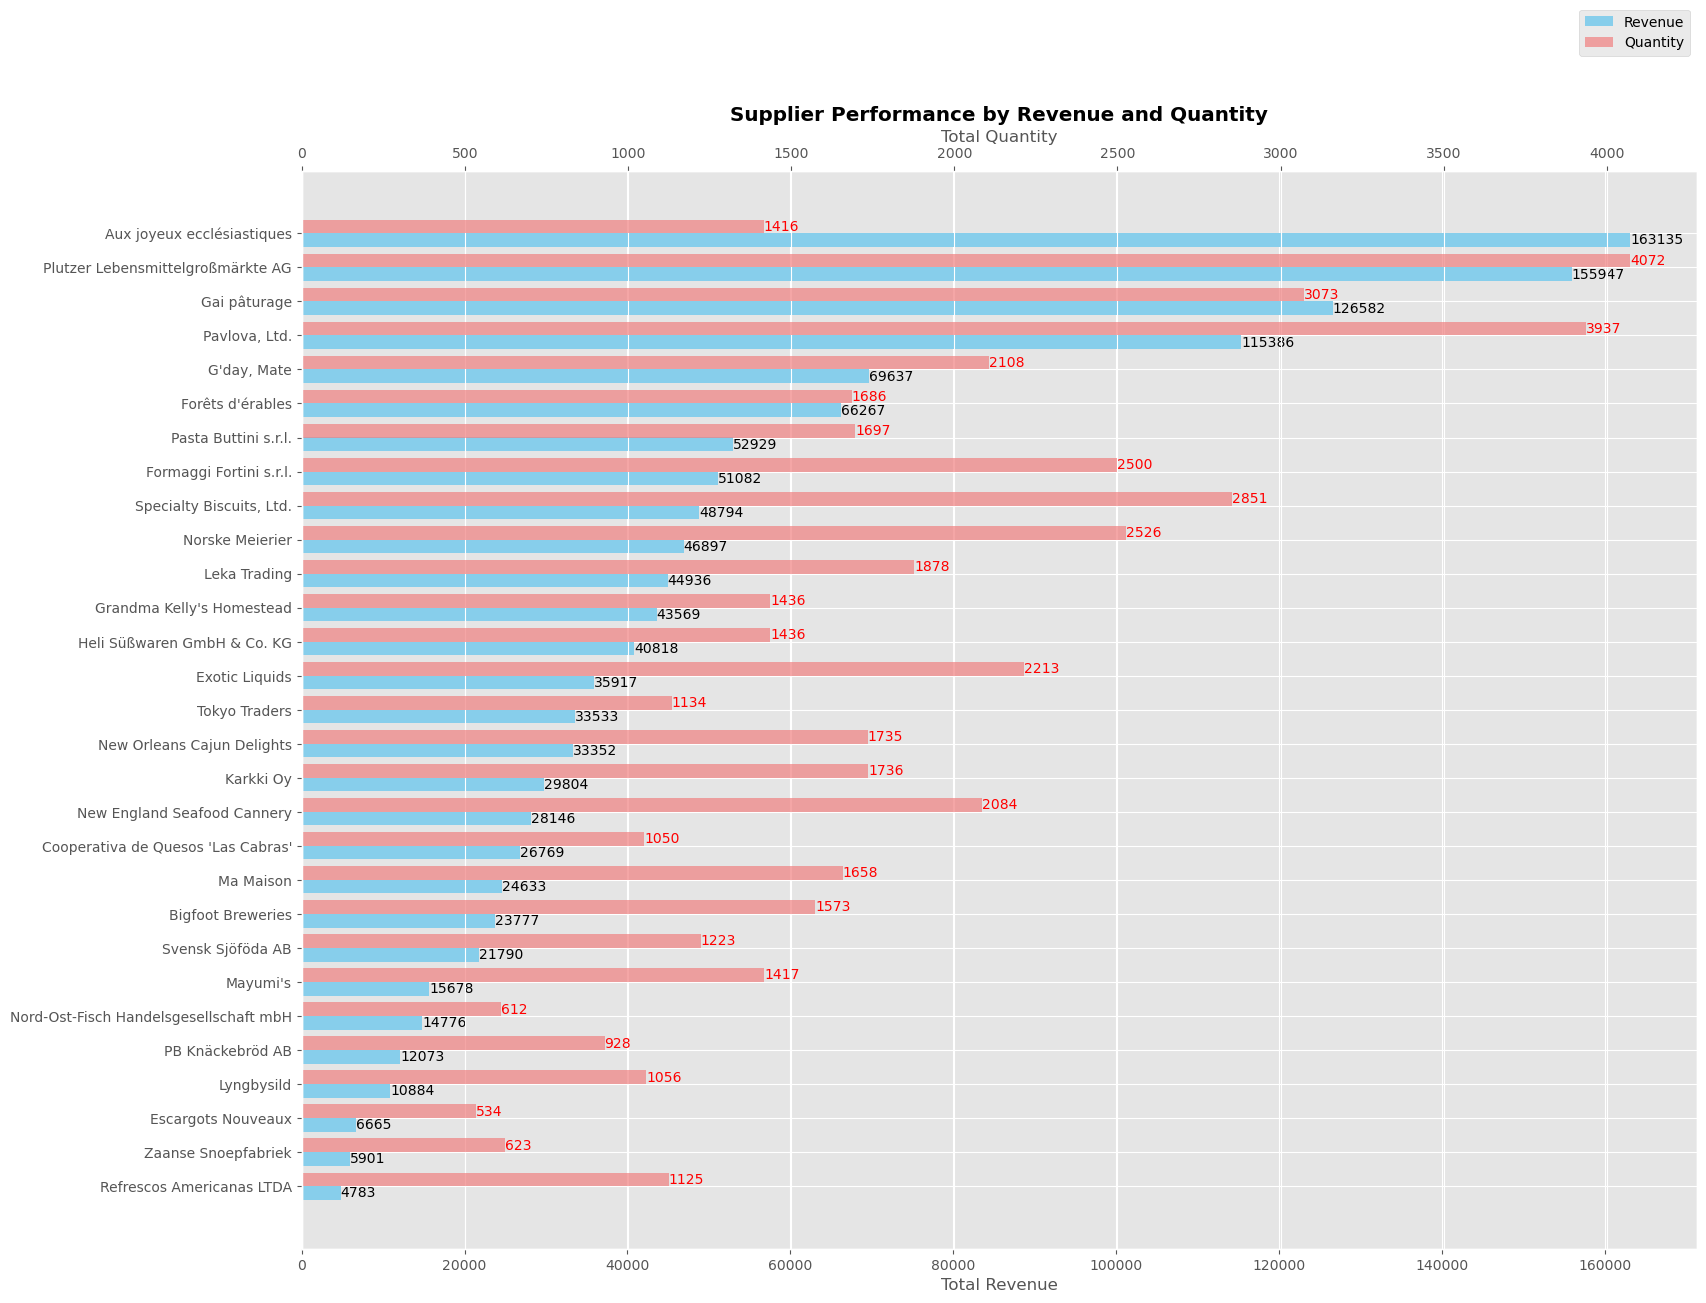

In [37]:
import numpy
# Group by SupplierName and calculate total revenue and total quantity
supplier_data = suppliers_analysis.groupby('SupplierName')[["Revenue", "Quantity"]].sum().reset_index().sort_values(by="Revenue", ascending=True)

# Plot supplier performance
fig, ax = plt.subplots(figsize=(18, 14))

# Set the bar width
bar_width = 0.4

# Set the y positions
y_pos = numpy.arange(len(supplier_data['SupplierName']))

# Plotting the revenue
bars1 = ax.barh(y_pos - bar_width/2, supplier_data['Revenue'], bar_width, color='skyblue', label='Revenue')

# Creating secondary axis for quantity at the bottom
ax2 = ax.twiny()
bars2 = ax2.barh(y_pos + bar_width/2, supplier_data['Quantity'], bar_width, color='lightcoral', alpha=0.7, label='Quantity')

# Set the labels and title
ax.set_yticks(y_pos)
ax.set_yticklabels(supplier_data['SupplierName'])
ax.set_xlabel('Total Revenue')
ax2.set_xlabel('Total Quantity')
ax.set_title('Supplier Performance by Revenue and Quantity', fontweight='bold')

# Add revenue values at the end of the bars, rounded to 0 decimal places
for bar in bars1:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', va='center', ha='left')

# Add quantity values at the end of the bars, rounded to 0 decimal places
for bar in bars2:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2, f'{width:.0f}', va='center', ha='left', color='red')

# Add legends
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 1.0))

plt.show()

### **Insights & Business Recommendations**

| Supplier Name                                | Insights                                                                 | Business Recommendations                                                  |
|----------------------------------------------|--------------------------------------------------------------------------|---------------------------------------------------------------------------|
| Aux joyeux ecclésiastiques                   | Highest revenue (~163,135) and highest quantity (~4,072).                | Prioritize maintaining a strong relationship and negotiate bulk discounts. |
| Plutzer Lebensmittelgroßmärkte AG            | High revenue (~155,947) and high quantity (~3,937).                      | Consider increasing orders to leverage economies of scale.                |
| Gai pâturage                                 | Significant revenue (~126,582) with moderate quantity (~3,073).          | Assess supply reliability and explore further collaboration opportunities. |
| Pavlova, Ltd.                                | Strong revenue (~115,386) with good quantity (~3,937).                   | Maintain consistent supply agreements to ensure steady product flow.      |
| G’day, Mate                                  | Mid-tier revenue (~69,637) with decent quantity (~2,108).                | Monitor supplier performance for potential scaling.                       |
| Forêts d'érables                             | Moderate revenue (~66,267) with moderate quantity (~1,686).              | Evaluate demand trends and negotiate pricing improvements.                |
| Pasta Buttini s.r.l.                         | Balanced revenue (~52,929) with stable quantity (~1,697).                | Ensure supply chain stability and explore potential expansion.            |
| Formaggi Fortini s.r.l.                      | Mid-level revenue (~51,082) but relatively high quantity (~2,500).       | Optimize inventory to manage higher volume supply efficiently.            |
| Specialty Biscuits, Ltd.                     | Decent revenue (~48,794) with good quantity (~2,851).                    | Investigate potential volume discounts for cost savings.                  |
| Norske Meierier                              | Moderate revenue (~46,897) and quantity (~2,526).                        | Ensure supplier diversification to avoid dependency risks.                |
| Leka Trading                                 | Lower revenue (~44,936) with moderate quantity (~1,878).                 | Assess supplier pricing models for potential cost reductions.             |
| Grandma Kelly’s Homestead                    | Lower revenue (~43,569) with low quantity (~1,436).                      | Consider alternative suppliers if cost-efficiency is a concern.           |
| Heli Süßwaren GmbH & Co. KG                  | Lower revenue (~40,818) with minimal quantity (~1,436).                  | Evaluate profitability and consider renegotiating supply terms.           |
| Exotic Liquids                               | Modest revenue (~35,917) with relatively low quantity (~2,213).          | Monitor demand fluctuations and adjust order sizes accordingly.           |
| Tokyo Traders                                | Low revenue (~33,533) with limited quantity (~1,735).                    | Consider alternative suppliers for better pricing or quality.             |
| New Orleans Cajun Delights                   | Low revenue (~33,352) with minimal quantity (~1,736).                    | Optimize order volumes to align with demand trends.                       |
| Karkki Oy                                    | Low revenue (~29,804) with moderate quantity (~2,084).                   | Review pricing agreements to improve cost-effectiveness.                  |
| New England Seafood Cannery                  | Low revenue (~28,146) with limited quantity (~1,578).                    | Assess supplier efficiency for potential improvement strategies.          |
| Cooperativa de Quesos 'Las Cabras'           | Very low revenue (~26,769) with minimal quantity (~1,050).               | Evaluate supplier viability based on demand needs.                        |
| Ma Maison                                    | Very low revenue (~24,633) with limited quantity (~1,658).               | Monitor supplier contribution and adjust procurement plans accordingly.   |
| Bigfoot Breweries                            | Very low revenue (~23,777) with minimal quantity (~1,573).               | Assess alternative suppliers for better cost-efficiency.                  |
| Svensk Sjöföda AB                            | Very low revenue (~21,790) with small quantity (~1,223).                 | Consider supplier consolidation to improve purchasing power.              |
| Mayumi’s                                     | Very low revenue (~14,776) with very low quantity (~1,417).              | Assess market demand before continuing procurement.                       |
| Nord-Ost-Fisch Handelsgesellschaft mbH       | Extremely low revenue (~10,884) with minimal quantity (~612).            | Reevaluate supplier contribution to business goals.                       |
| PB Knäckebröd AB                             | Extremely low revenue (~12,073) with small quantity (~928).              | Monitor cost-effectiveness and supply chain impact.                       |
| Lyngbysild                                   | Negligible revenue (~10,884) with very low quantity (~928).              | Consider supplier replacement if performance remains low.                 |
| Escargots Nouveaux                           | Minimal revenue (~6,665) with very low quantity (~534).                  | Evaluate if supplier is necessary for business operations.                |
| Zaanse Snoepfabriek                          | Minimal revenue (~5,901) with negligible quantity (~623).                 | Consider discontinuing or finding better-performing suppliers.            |
| Refrescos Americanas LTDA                    | Lowest revenue (~4,783) with minimal quantity (~1,125).                   | Assess supplier necessity based on product demand.                        |


---

### **Shipping Time Analysis**
**Objectives**

- Analyze the average shipping time for each supplier.

- Identify suppliers with the fastest and slowest shipping times.

**Business Use-case**

This analysis helps in improving customer satisfaction by identifying suppliers with slow shipping times and working with them to improve delivery performance.

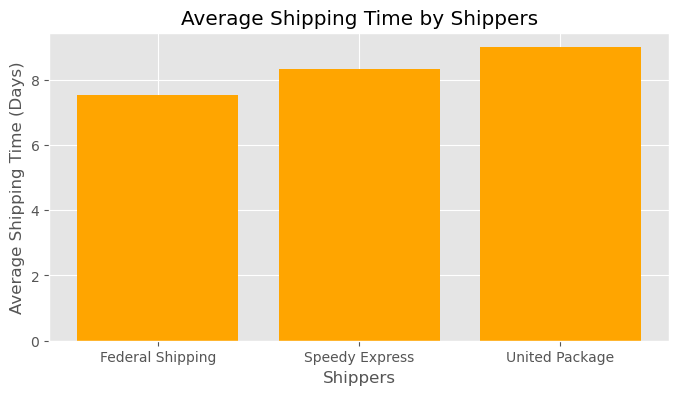

In [39]:
# Calculate average shipping time per supplier
supplier_shipping_time = suppliers_analysis.groupby('ShipperName')['ShippingTime'].mean().reset_index()

# Plot average shipping time
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(supplier_shipping_time['ShipperName'], supplier_shipping_time['ShippingTime'], color='orange')
ax.set_title('Average Shipping Time by Shippers')
ax.set_xlabel('Shippers')
ax.set_ylabel('Average Shipping Time (Days)')
ax.set_xticks(range(len(supplier_shipping_time['ShipperName'])))
ax.set_xticklabels(supplier_shipping_time['ShipperName'])
plt.show()

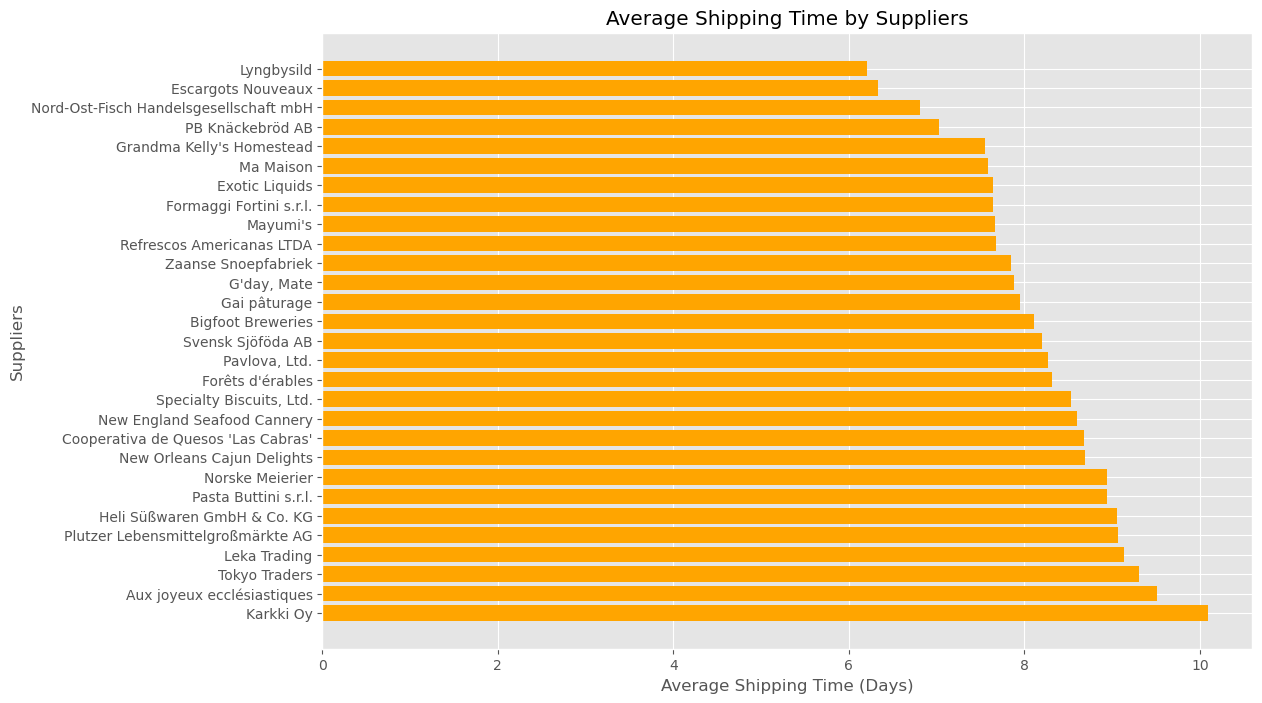

In [40]:
# Calculate average shipping time per supplier
supplier_shipping_time = suppliers_analysis.groupby('SupplierName')['ShippingTime'].mean().reset_index().sort_values(by="ShippingTime", ascending=False)

# Plot average shipping time
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(supplier_shipping_time['SupplierName'], supplier_shipping_time['ShippingTime'], color='orange')
ax.set_title('Average Shipping Time by Suppliers')
ax.set_xlabel('Average Shipping Time (Days)')
ax.set_ylabel('Suppliers')
plt.show()

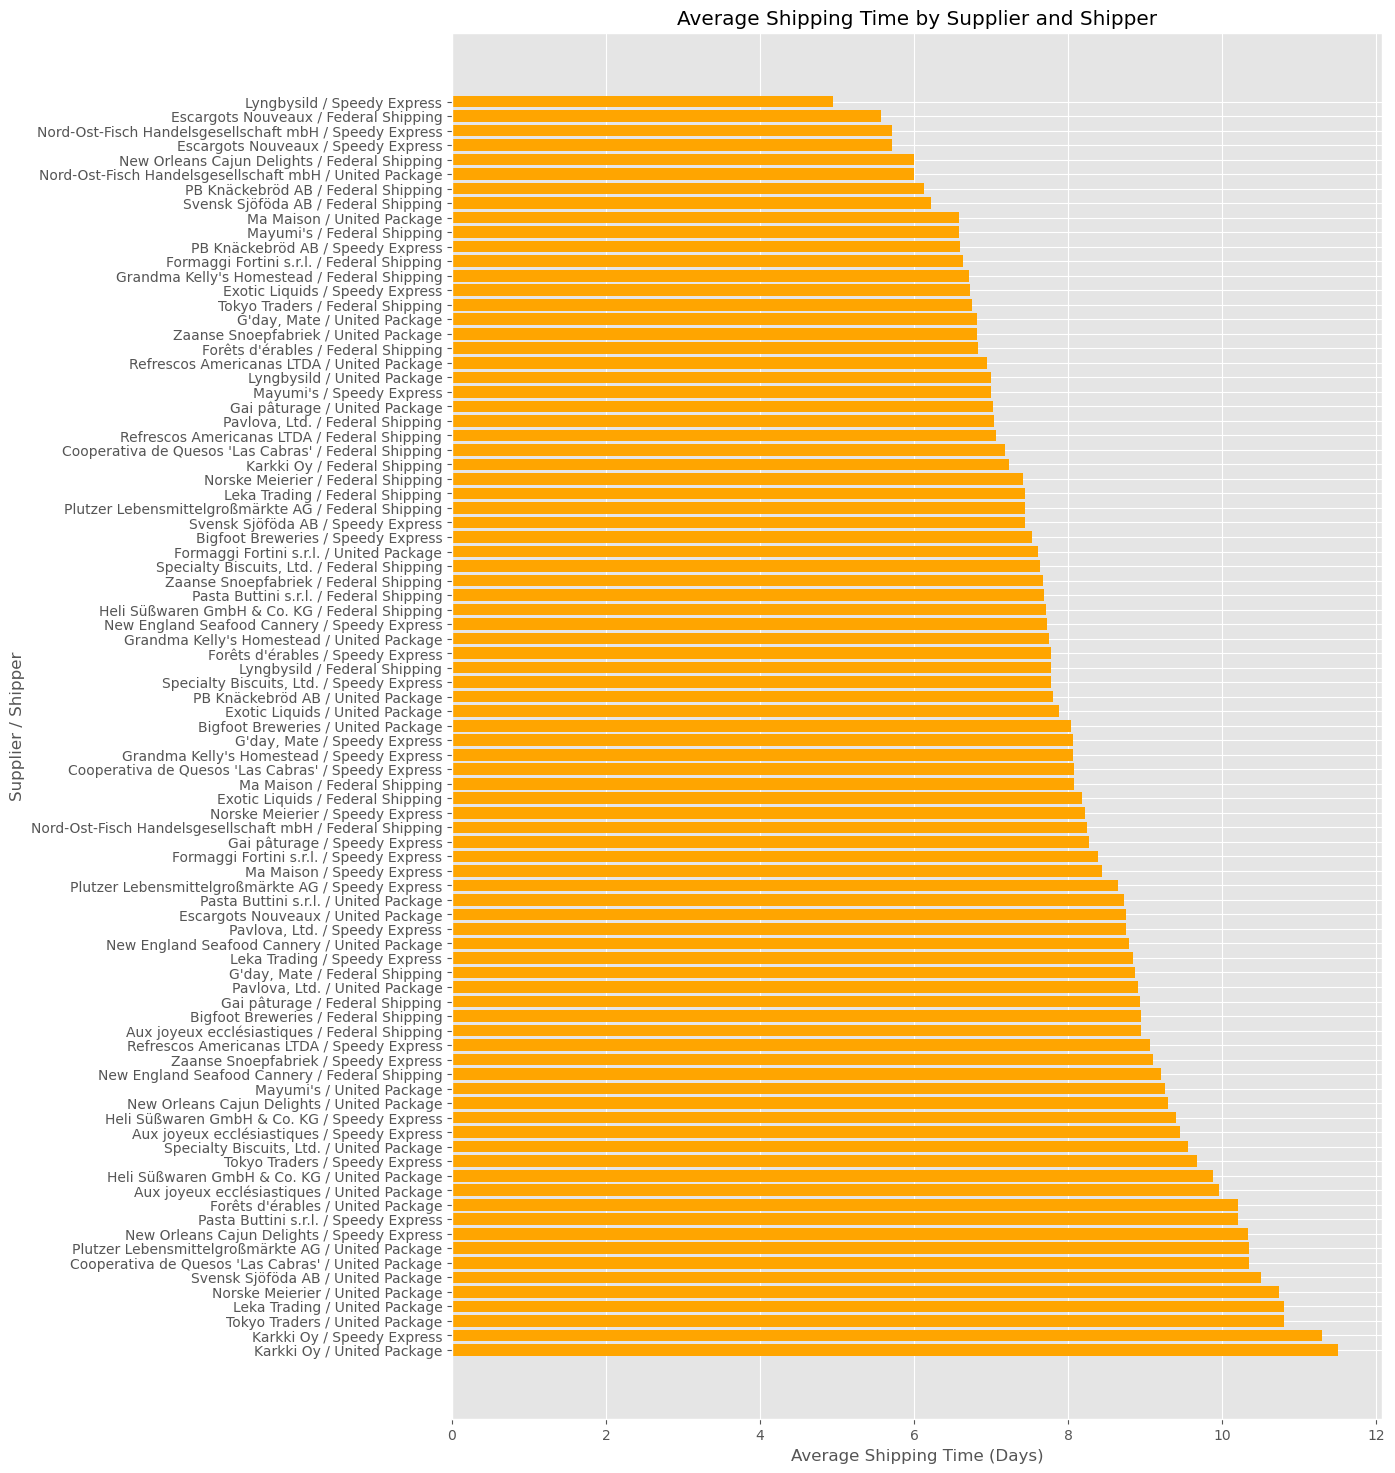

In [41]:
# Calculate average shipping time per supplier and shipper
supplier_shipper_shipping_time = suppliers_analysis.groupby(['SupplierName', 'ShipperName'])['ShippingTime'].mean().reset_index().sort_values(by="ShippingTime", ascending=False)

# Plot average shipping time
fig, ax = plt.subplots(figsize=(12, 18))
ax.barh(supplier_shipper_shipping_time['SupplierName'] + ' / ' + supplier_shipper_shipping_time['ShipperName'], 
        supplier_shipper_shipping_time['ShippingTime'], color='orange')
ax.set_title('Average Shipping Time by Supplier and Shipper')
ax.set_xlabel('Average Shipping Time (Days)')
ax.set_ylabel('Supplier / Shipper')
plt.show()

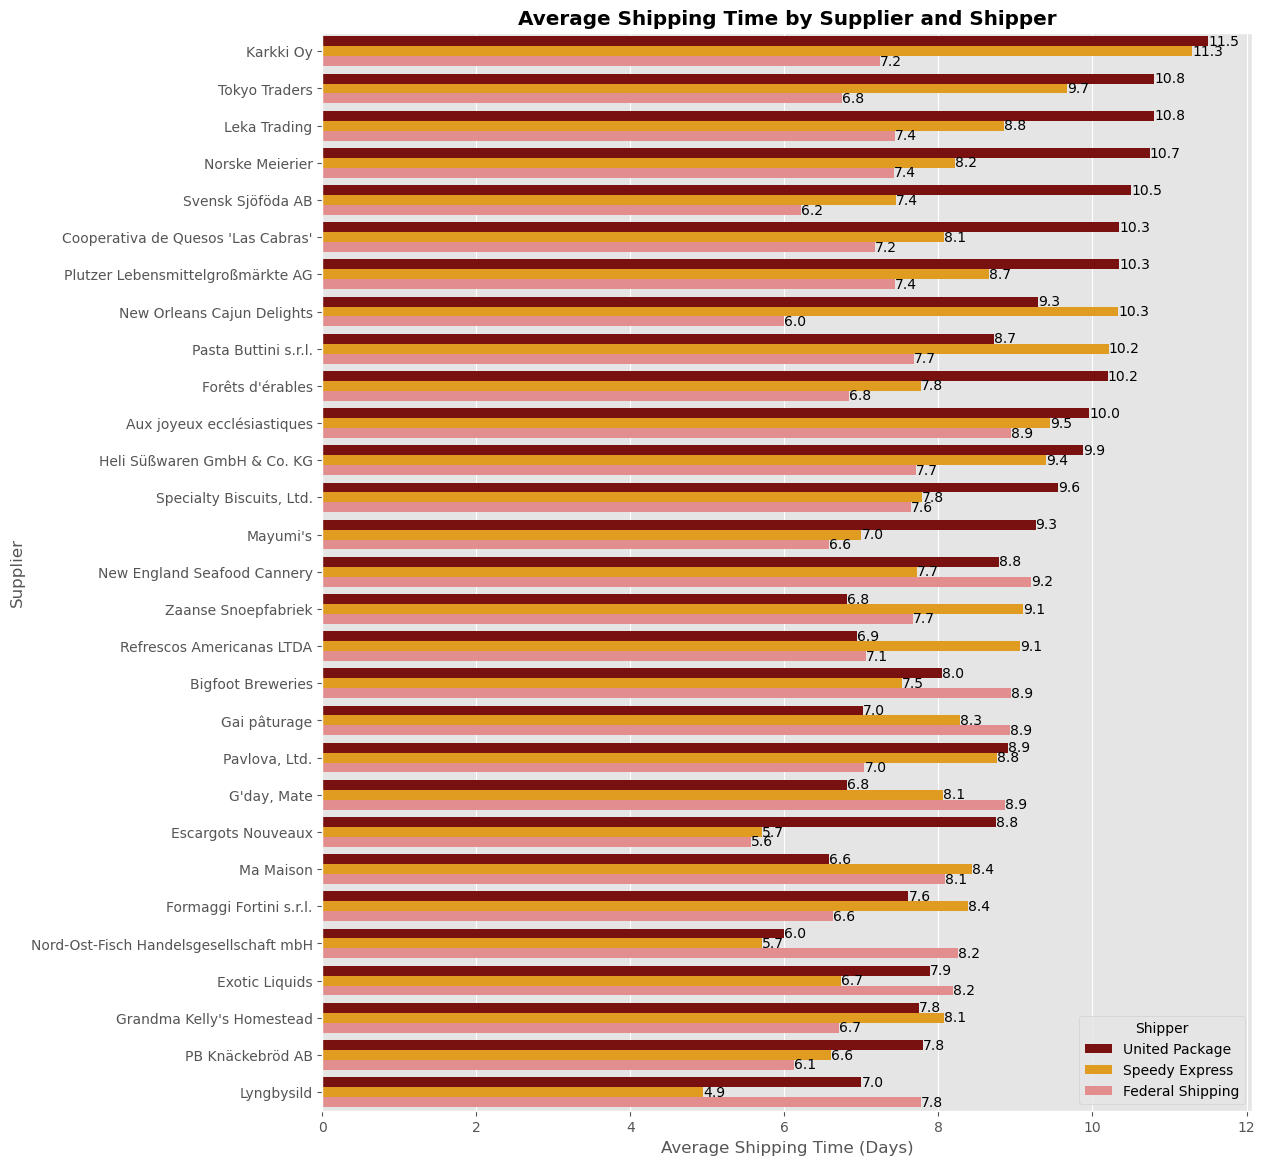

In [42]:
# Calculate average shipping time per supplier and shipper
supplier_shipper_shipping_time = suppliers_analysis.groupby(['SupplierName', 'ShipperName'])['ShippingTime'].mean().reset_index().sort_values(by="ShippingTime", ascending=False)

# Generate a custom continuous color palette
num_colors = supplier_shipper_shipping_time['ShipperName'].nunique()
custom_palette = sns.color_palette(sns.blend_palette(['darkred', 'orange', 'lightcoral'], num_colors))

# Plot average shipping time using seaborn
plt.figure(figsize=(12, 14))
ax = sns.barplot(x='ShippingTime', y='SupplierName', hue='ShipperName', data=supplier_shipper_shipping_time, palette=custom_palette)
plt.title('Average Shipping Time by Supplier and Shipper', weight='bold')
plt.xlabel('Average Shipping Time (Days)')
plt.ylabel('Supplier')
plt.legend(title='Shipper')

# Annotate the bars with the shipping time values
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge')

plt.show()

### **Insights & Business Recommendations**

| Supplier's Name                          | Insights                                                                 | Business Recommendations                                                                 |
|------------------------------------------|--------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| Karkki Oy                                | Highest average shipping time among suppliers.                           | Consider evaluating alternative shippers or renegotiating terms with current shippers.   |
| Tokyo Traders                            | High shipping times across multiple shippers.                            | Investigate shipper performance and explore options for faster delivery services.        |
| Leka Trading                             | Consistently high shipping times.                                       | Assess logistics processes and consider diversifying shipper options.                    |
| Norske Meierier                          | High shipping times, similar to other top suppliers.                    | Review shipping contracts and explore expedited shipping options.                        |
| Svensk Sjöföda AB                        | High shipping times, but slightly lower than top suppliers.              | Optimize shipping routes and consider bulk shipping discounts.                           |
| Cooperativa de Quesos 'Las Cabras'       | Moderate to high shipping times.                                        | Evaluate shipper reliability and consider regional distribution centers.                 |
| Plutzer Lebensmittelgroßmärkte AG        | Moderate to high shipping times.                                        | Explore partnerships with local shippers for faster delivery.                            |
| New Orleans Cajun Delights               | Moderate shipping times with some variability.                          | Monitor shipper performance and consider alternative logistics solutions.                |
| Pasta Buttini s.r.l.                     | Moderate shipping times.                                                | Assess the impact of shipping times on customer satisfaction and adjust strategies.      |
| Forêts d'érables                         | Moderate shipping times.                                                | Consider implementing just-in-time inventory to mitigate shipping delays.                |
| Aux joyeux ecclésiastiques               | Moderate shipping times with some variability.                          | Review shipper contracts and consider performance-based incentives.                      |
| Hell Süßwaren GmbH & Co. KG              | Moderate shipping times.                                                | Evaluate the cost-benefit of faster shipping options.                                    |
| Specialty Biscuits, Ltd.                 | Moderate shipping times.                                                | Consider regional warehousing to reduce shipping times.                                  |
| Mayumi's                                 | Lower shipping times compared to others.                                | Maintain current shipper relationships but monitor for consistency.                      |
| New England Seafood Cannery              | Lower shipping times.                                                   | Continue current shipping strategies but explore potential for further optimization.     |
| Zaanse Snoepfabriek                      | Lower shipping times.                                                   | Assess customer feedback on shipping times and adjust as needed.                         |
| Refrescos Americanas LTDA                | Lower shipping times.                                                   | Consider expanding shipper options to ensure competitive rates.                          |
| Bigfoot Breweries                        | Lower shipping times.                                                   | Monitor shipper performance and consider loyalty programs for reliable shippers.         |
| Gai pâturage                             | Lower shipping times.                                                   | Evaluate the impact of shipping times on overall customer satisfaction.                  |
| Pavlova, Ltd.                            | Lower shipping times.                                                   | Continue to optimize shipping routes and schedules.                                       |
| G'day, Mate                              | Lower shipping times.                                                   | Consider customer surveys to understand the importance of shipping times.                |
| Escargots Nouveaux                       | Lower shipping times.                                                   | Explore opportunities for further reducing shipping times without increasing costs.      |
| Ma Maison                                | Lower shipping times.                                                   | Maintain current shipping strategies but keep an eye on market trends.                   |
| Formaggi Fortini s.r.l.                  | Lower shipping times.                                                   | Consider benchmarking against competitors to ensure competitive shipping times.          |
| Nord-Ost-Fisch Handelsgesellschaft mbH   | Lower shipping times.                                                   | Assess the potential for further logistics optimization.                                 |
| Exotic Liquids                           | Lower shipping times.                                                   | Continue to monitor and optimize shipping processes.                                      |
| Grandma Kelly's Homestead                | Lower shipping times.                                                   | Consider customer retention strategies based on reliable shipping times.                 |
| PB Knäckebröd AB                         | Lowest shipping times among suppliers.                                   | Leverage fast shipping times as a competitive advantage in marketing.                    |
| Lyngbysild                               | Lowest shipping times.                                                  | Highlight fast shipping in customer communications to enhance brand reputation.          |